# ゲームで考える課金施策
「恋愛シミュレーション」というゲームの一ジャンルがあります。
ゲームの中の登場人物と恋愛するゲームです。
シナリオを最後まで読むと、登場人物と（二次元で）結ばれます！

![ときメモ](https://nsx.np.dl.playstation.net/nsx/material/e/e17175578a72e697a6b2ef7b7a955cbfaaad849c-914763.jpg)
![AIR](https://lh3.ggpht.com/C_cbx8aSjgT2qbdrSCqhWPYyc9LMeEX3SvUSQvOrV4ba-n4DTX2vDCFuRMhDrBTXoFw=h900)
![うたプリ](http://www.jp.playstation.com/software/title/8tnu01000005edeb-img/8tnu01000005edl0.jpg)

[参考:Playstation store](https://store.playstation.com/ja-jp/product/JP0101-NPJJ00303_00-0000000000000001)

[参考:google play](https://play.google.com/store/apps/details?id=jp.co.prot.air)

[参考:playstation store](http://www.jp.playstation.com/software/title/pbgp0089.html)

※あくまでイメージです。以下で説明するゲームのシステムと画像のゲームのシステムはかなり異なります。課金恋愛シミュレーションで誰でも知ってる有名なゲームがないので・・・

---

- 全体でn話のシナリオ（今回は簡略化のためn=10）
- シナリオの続きを読むには「ミニゲーム」（アルバイト）をクリアしポイントを貯める
- 「ミニゲーム」をするには「体力」というパラメータを消費する
- 「体力」の回復には「体力回復アイテム」（有料）を使う or 現実時間の経過
- 「イベントシナリオ」課金特権で特別シナリオ

<img src="image/simulationgame.png">

あなたはこのゲームのプロデューサーです。
ユーザーからお金を取ることを考えていきます。

---
## 目的
有料アイテムを売ること

そのために、

* 関係ありそうな項目を２つ以上取り出して、相関関係を見ていく
* 「離脱」「売り上げ減」につながる相関関係を見出しゲームを改善
* 「売り上げ増」につながる相関関係を見出しテコ入れ

---
## 1.「平均ミニゲーム挑戦回数」「平均体力回復アイテムの売り上げ個数」
- 仮説：ミニゲーム難易度↑、体力回復アイテム売り上げ個数↑

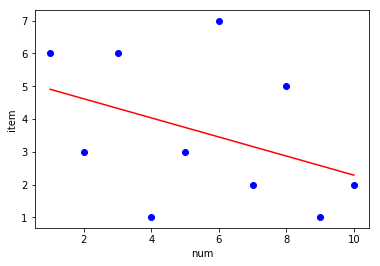

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [6,3,6,1,3,7,2,5,1,2]

slr = LinearRegression()
slr.fit(x,y)

lin_regplot(x, y, slr)
plt.xlabel("num")
plt.ylabel("item")
plt.show()


予想と違って、あまり関係がないようです。むしろ、挑戦回数が増えるほど体力回復アイテム購入数が減っているようで、難しくするほど挫折してゲームから離脱している可能性が有り得そうです。

---
##  2.「ミニゲーム挑戦回数」「離脱率」
- 仮説：ミニゲームが難しいほどユーザーが飽きて離脱（ゲームを辞める）

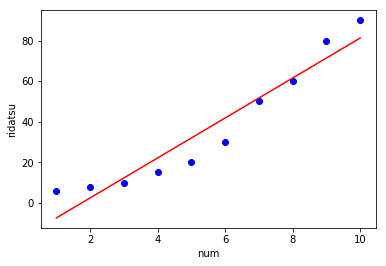

In [2]:
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [6,8,10,15,20,30,50,60,80,90]

slr = LinearRegression()
slr.fit(x,y)

lin_regplot(x, y, slr)
plt.xlabel("num")
plt.ylabel("ridatsu")
plt.show()


なんとなく関係がありそうです。

---
##  3.「ユーザーのシナリオ進捗」「イベントシナリオ購入数」
- 仮説：シナリオをたくさん進めているユーザーほど（ゲームにはまっているので）課金シナリオを買う

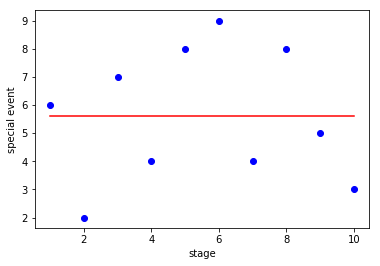

In [3]:
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [6,2,7,4,8,9,4,8,5,3]
slr = LinearRegression()
slr.fit(x,y)

lin_regplot(x, y, slr)
plt.xlabel("stage")
plt.ylabel("special event")
plt.show()

目立った関係はみられなそうです。当てが外れてしまいました。


## 相関係数で相関関係を見る
データ間の関係性の強さを見る指標に「相関係数」があります。
（$ \frac{xとyの共分散}{xの標準偏差 \times yの標準偏差} $）

[数学参考:相関係数](数学説明.ipynb#相関係数)

それぞれの相関係数を出すと、

* 1.「平均ミニゲーム挑戦回数」「平均体力回復アイテムの売り上げ個数」
-0.40
* 2.「ミニゲーム挑戦回数」「離脱率」
0.96
* 3.「ユーザーのシナリオ進捗」「イベントシナリオ購入数」
0

一般的に「相関係数が0.7を超える」場合は強い相関関係があると考えられている。

![相関係数](http://business.nikkeibp.co.jp/atclbdt/15/recipe/101500003/beer-diaper-13-1.png?__scale=w:235,h:114&_sh=08d03c0e00)

[参考:2つの支出データの類似度合いを示す「相関係数」](http://business.nikkeibp.co.jp/atclbdt/15/recipe/101500003/)

「2.「ミニゲーム挑戦回数」「離脱率」」は強い相関関係があると見られる

---
## まとめ
* 「ミニゲーム挑戦回数」が増えるほど「離脱率」が増える

（具体的には「ミニゲーム挑戦回数」が1増えると離脱率が10%増える）

ミニゲームの難易度を、想定範囲の離脱率にまで下げる工夫が必要だと考えられる

例えば、

* 「離脱率」を20%以下にするには「ミニゲーム挑戦回数」を4以下にすると良い

などの施策を考えられるようになる